<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-2-phase-2-atlobsang/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Andrew_Lobsang%2C_John_Vogel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

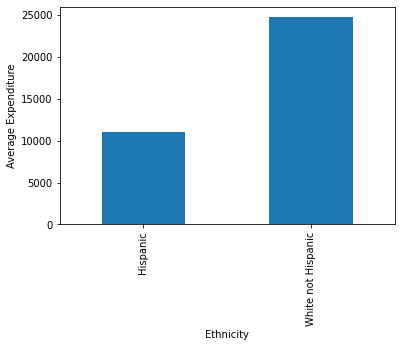

In [ ]:
import pandas as pd
df_dds = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df_dds.groupby("Ethnicity")["Expenditures"].mean()[["Hispanic", "White not Hispanic"]].plot.bar(ylabel = "Average Expenditure")

**The average expenditure for non-Hispanic whites appears to be more than twice the average expenditure for Hispanics.**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

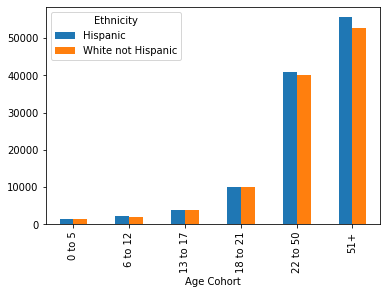

In [ ]:
df_whitehisp = df_dds.loc[df_dds["Ethnicity"].str.contains("Hispanic")]
df_whitehisp.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().unstack(level = "Ethnicity").loc[["0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", "51+"]].plot.bar()

**The plot above seems to show that Hispanic residents are consistantly getting higher expenditures than white residents in the same age group except for 18-21. This contradicts the prior observation that the average white expenditures was twice the one for Hispanics.**

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

,count,mean,std,min,25%,50%,75%,max
Ethnicity,,,,,,,,
Hispanic,376.0,17.375000,14.260820,0.0,9.75,15.0,20.0,95.0
White not Hispanic,401.0,27.975062,20.266213,0.0,15.00,21.0,33.0,90.0


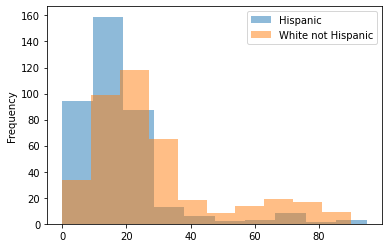

In [ ]:
df_whitehisp.groupby("Ethnicity")["Age"].plot.hist(alpha=0.5,legend=True)
df_whitehisp.groupby("Ethnicity")["Age"].describe()

Age Cohort
0 to 5       1415.280488
6 to 12      2226.862857
13 to 17     3922.613208
18 to 21     9888.537688
22 to 50    40209.283186
51+         53521.896226
Name: Expenditures, dtype: float64

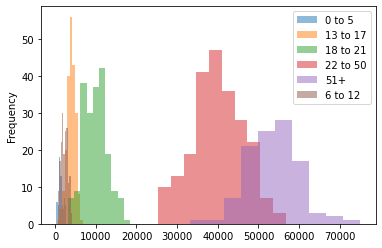

In [ ]:
df_dds.groupby("Age Cohort")["Expenditures"].plot.hist(alpha=0.5,legend=True, xlabel = "Expenditures")
df_dds.groupby("Age Cohort")["Expenditures"].mean().loc[["0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", "51+"]]

**Compared to Hispanic residents, the White residents are much older on average than the Hispanic residents. The expense of a resident seems to be related to their age, with the average 51+ year old getting more than 5 times what an average 18-21 would recieved. Both of these facts combine to show that Whites have a much higher expenditure because the most whites that recieve funds are older and as such necessitate higher expenditures.**

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.